In [3]:
import pandas as pd
import numpy as np
folder = 'd:/git/project1/generated'

In [5]:
data = pd.read_csv(f'{folder}/set_393.csv')

In [56]:
data.direct.value_counts()

1    147178
0    122552
Name: direct, dtype: int64

In [58]:
%%time
data.corr()['direct'].sort_values()

Wall time: 10min 12s


1           -0.006214
743         -0.005947
515         -0.005944
498         -0.005755
740         -0.005667
               ...   
246          0.004855
95           0.005296
724          0.005598
timestamp    0.010401
direct       1.000000
Name: direct, Length: 772, dtype: float64

In [11]:
x_train = np.array(data.iloc[:,2:770])
x_train

array([[-0.4034838 ,  0.14443266, -0.3661805 , ..., -0.6082279 ,
        -0.09164561,  0.10297806],
       [ 0.20007397, -0.10840943, -0.03382502, ..., -0.454662  ,
         0.3330778 ,  0.5927291 ],
       [-0.32451597,  0.34571984, -0.09549643, ..., -0.1839731 ,
         0.8870677 ,  0.10894743],
       ...,
       [ 0.04833257,  0.02356913,  0.00834493, ..., -0.35902038,
         0.53885067,  0.5699992 ],
       [-0.5332558 , -0.2431613 , -0.52935666, ..., -0.42315876,
         0.5575977 ,  0.2385725 ],
       [-0.28376433,  0.14391924,  0.50933635, ..., -0.3714652 ,
         0.75476134, -0.17048492]])

In [12]:
y_train = data['direct']
y_train

0         0
1         1
2         1
3         0
4         0
         ..
269725    1
269726    0
269727    1
269728    1
269729    0
Name: direct, Length: 269730, dtype: int64

In [13]:
import tensorflow
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
weights_file = f'{folder}/weights3.h5'
callback = ModelCheckpoint(weights_file, monitor='val_binary_accuracy', mode='max', save_best_only=True)
tensorboard_cbk = TensorBoard(log_dir=f'{folder}/logs')
reduce = ReduceLROnPlateau(monitor="val_loss", patience=5, min_lr=0.000001, verbose=1)

In [23]:
model = models.Sequential()

model.add(layers.Dense(384, input_shape=(768,), activity_regularizer=regularizers.l2(0.02), kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(192, activity_regularizer=regularizers.l2(0.02), kernel_initializer="he_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Dense(1, activation='sigmoid'))

#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [24]:
json_file = f'{folder}/model10.json'
model_json = model.to_json()

with open(json_file, 'w') as file:
    file.write(model_json)

In [25]:
history = model.fit(x_train, y_train, epochs=5, batch_size=2000, validation_split=0.3, callbacks=[callback, tensorboard_cbk, reduce])


Epoch 1/5
95/95 [==============================] - 24s 233ms/step - loss: 6.2022 - binary_accuracy: 0.5142 - val_loss: 1.1829 - val_binary_accuracy: 0.5296
Epoch 2/5
95/95 [==============================] - 16s 172ms/step - loss: 1.7385 - binary_accuracy: 0.5260 - val_loss: 0.9296 - val_binary_accuracy: 0.5344
Epoch 3/5
95/95 [==============================] - 16s 174ms/step - loss: 1.0696 - binary_accuracy: 0.5262 - val_loss: 0.8466 - val_binary_accuracy: 0.5410
Epoch 4/5
95/95 [==============================] - 16s 174ms/step - loss: 0.8780 - binary_accuracy: 0.5369 - val_loss: 0.8036 - val_binary_accuracy: 0.5428
Epoch 5/5
95/95 [==============================] - 17s 180ms/step - loss: 0.8069 - binary_accuracy: 0.5448 - val_loss: 0.7766 - val_binary_accuracy: 0.5429


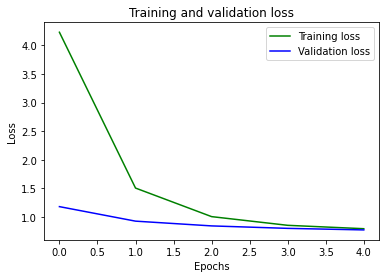

In [26]:
start = 0
loss_values = history.history['loss'][start:]
val_loss_values = history.history['val_loss'][start:]
epochs = range(start, len(loss_values) + start)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

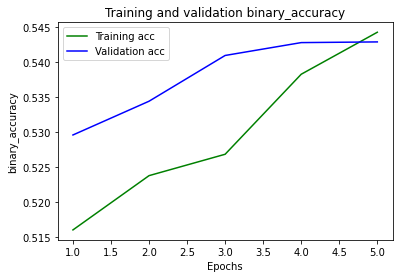

In [28]:
plt.clf()
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'g', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation binary_accuracy')
plt.xlabel('Epochs')
plt.ylabel('binary_accuracy')
plt.legend()
plt.show()

In [29]:
test = pd.read_csv(f'{folder}/set_1.csv')
test

,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,6,7,...,760,761,762,763,764,765,766,767,timestamp,direct
0,0,0,-0.234506,0.001747,-0.425283,-0.185730,-0.449682,-0.285066,0.336206,0.365718,...,-0.363680,0.000903,0.321855,-0.025091,-0.262637,-0.499886,0.205020,0.290831,1592265600,1
1,1,1,-0.774405,-0.042122,0.240691,0.124148,-0.406130,0.157978,0.264758,0.396746,...,0.192102,-0.469086,0.613902,0.126426,-0.471794,-0.439522,0.561788,0.474558,1611100800,0
2,2,2,-0.960810,0.046204,-0.002165,-0.057394,-0.519912,0.236540,0.252079,0.080769,...,1.118973,0.082588,-0.012194,-0.595636,-0.414950,-0.104115,-0.020574,0.189930,1597536000,1
3,3,3,-0.226224,0.123770,0.048377,0.268313,-0.452042,-0.152237,0.045668,0.364201,...,0.130809,-0.304922,0.107301,-0.140509,-0.510929,-0.084037,0.537480,0.413021,1613088000,0
4,4,4,-0.422775,0.277691,-0.753847,-0.029567,-0.922903,-0.034563,0.491929,0.624603,...,0.446212,0.008098,0.457908,0.246349,0.069831,-0.714982,0.303541,0.257397,1584921600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,3991,994,-0.520707,-0.487373,0.144352,0.063050,0.106835,-0.189484,0.081531,0.314267,...,-0.334263,-0.240833,0.092752,-0.130132,-0.270268,-0.030455,0.034798,0.224623,1596758400,0
3992,3992,995,-0.012538,-0.452542,0.167107,0.047215,-0.331293,-0.220291,0.866564,0.184508,...,0.309732,-0.363114,0.069599,-0.153434,-0.094220,-0.283501,0.416555,0.148161,1550793600,1
3993,3993,996,-0.362439,-0.355747,0.476702,-0.260408,-0.943103,-0.023870,0.514249,0.663708,...,0.591386,0.024250,0.524859,0.207623,-0.409921,-0.378747,0.055286,0.367741,1584576000,1
3994,3994,997,0.169624,-0.067058,-0.158985,-0.295147,-0.060189,-0.441862,0.217594,0.927954,...,0.308782,-0.077360,-0.095935,-0.633258,-0.025333,-0.267030,-0.184257,0.096888,1585699200,1


In [30]:
x_test = np.array(test.iloc[:,2:770])
x_test

array([[-0.23450609,  0.00174726, -0.4252834 , ..., -0.49988624,
         0.20502003,  0.2908311 ],
       [-0.7744051 , -0.04212204,  0.24069141, ..., -0.43952185,
         0.56178784,  0.47455823],
       [-0.96081024,  0.0462044 , -0.00216468, ..., -0.1041152 ,
        -0.02057445,  0.18992996],
       ...,
       [-0.36243883, -0.35574695,  0.4767023 , ..., -0.3787471 ,
         0.0552863 ,  0.36774135],
       [ 0.16962445, -0.06705774, -0.15898511, ..., -0.2670297 ,
        -0.18425675,  0.09688773],
       [-0.39473602,  0.0325707 ,  0.15303004, ..., -0.3356912 ,
         0.6562847 ,  0.34361416]])

In [31]:
y_test = np.array(test['direct'])
y_test

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
results = model.evaluate(x_test, y_test)
print(results)

125/125 [==============================] - 1s 4ms/step - loss: 0.7761 - binary_accuracy: 0.5528
[0.7760761380195618, 0.5528028011322021]


In [33]:
predictions = model.predict(x_test)
predictions

array([[0.5185213 ],
       [0.51759183],
       [0.5237538 ],
       ...,
       [0.5203293 ],
       [0.5159704 ],
       [0.51222754]], dtype=float32)

In [37]:
threshold = 0.5
predictions_df = pd.DataFrame()
predictions_df['direct'] = [1 if val > threshold else 0 for val in predictions]
predictions_df['direct'].value_counts()

1    3996
Name: direct, dtype: int64

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [45]:
#print(roc_auc_score(predictions_df['direct'], y_test))
print(confusion_matrix(predictions_df['direct'], y_test))
print(accuracy_score(predictions_df['direct'], y_test))

[[   0    0]
 [1787 2209]]
0.5528028028028028


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [55]:
%%time
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(solver="saga"), parameters)
grid_search.fit(x_train, y_train)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.0001}
best scrores:  0.5456493530567604
Wall time: 3h 21min 40s
Parser   : 174 ms


In [59]:
%%time
clf = LogisticRegression(solver="saga", C=0.0001)
clf.fit(x_train, y_train)

Wall time: 14min 28s


LogisticRegression(C=0.0001, solver='saga')

In [60]:
clf.score(x_test, y_test)

0.5528028028028028

In [63]:
from sklearn.dummy import DummyClassifier
clf_dummy = DummyClassifier()

scores = cross_val_score(clf_dummy, x_test, y_test)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dummy classifier score: 0.553 (+/- 0.00)


In [67]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(x_train, y_train)

In [ ]:
rf_pred = rf.predict(x_test)